<a href="https://colab.research.google.com/github/deepan-31/metadata-tool/blob/main/recurrentneuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from ann_visualizer.visualize import ann_viz
from graphviz import Source

In [ ]:
N = 1000
Tp = 800

t=np.arange(0,N)
x = np.sin(0.02*t)+2*np.random.rand(N)
df= pd.DataFrame(x)
df.head()

,0
0,0.433274
1,1.730161
2,2.009434
3,0.480856
4,0.804674


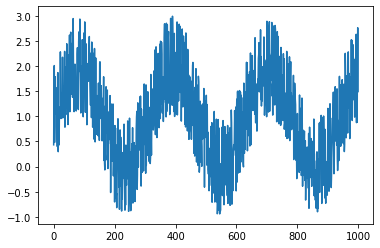

In [ ]:
plt.plot(df)
plt.show()

In [ ]:
values=df.values
train,test = values[0:Tp,:] ,values[Tp:N,:]

In [ ]:
step=4

test=np.append(test,np.repeat(test[-1,],step))
train=np.append(train,np.repeat(train[-1,],step))

In [ ]:
def convertToMatrix(data, step):
  X,Y=[],[]
  for i in range(len(data)-step):
    d=i+step
    X.append(data[i:d,])
    Y.append(data[d,])
  return np.array(X),np.array(Y)

In [ ]:
trainX,trainY = convertToMatrix(train,step)
testX,testY = convertToMatrix(test,step)

In [ ]:
trainX = np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX = np.reshape(testX,(testX.shape[0],1,testX.shape[1]))

In [ ]:
model = Sequential()
model.add(SimpleRNN(units=32,input_shape=(1,step),activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='rmsprop')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 32)                1184      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(trainX,trainY,epochs=100,batch_size=16,verbose=2)
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

Epoch 1/100
50/50 - 3s - loss: 0.7688 - 3s/epoch - 52ms/step
Epoch 2/100
50/50 - 0s - loss: 0.4157 - 156ms/epoch - 3ms/step
Epoch 3/100
50/50 - 0s - loss: 0.4051 - 134ms/epoch - 3ms/step
Epoch 4/100
50/50 - 0s - loss: 0.4032 - 141ms/epoch - 3ms/step
Epoch 5/100
50/50 - 0s - loss: 0.4003 - 130ms/epoch - 3ms/step
Epoch 6/100
50/50 - 0s - loss: 0.3985 - 139ms/epoch - 3ms/step
Epoch 7/100
50/50 - 0s - loss: 0.3952 - 158ms/epoch - 3ms/step
Epoch 8/100
50/50 - 0s - loss: 0.3992 - 168ms/epoch - 3ms/step
Epoch 9/100
50/50 - 0s - loss: 0.3946 - 155ms/epoch - 3ms/step
Epoch 10/100
50/50 - 0s - loss: 0.3932 - 158ms/epoch - 3ms/step
Epoch 11/100
50/50 - 0s - loss: 0.3921 - 103ms/epoch - 2ms/step
Epoch 12/100
50/50 - 0s - loss: 0.3931 - 100ms/epoch - 2ms/step
Epoch 13/100
50/50 - 0s - loss: 0.3881 - 91ms/epoch - 2ms/step
Epoch 14/100
50/50 - 0s - loss: 0.3924 - 96ms/epoch - 2ms/step
Epoch 15/100
50/50 - 0s - loss: 0.3913 - 103ms/epoch - 2ms/step
Epoch 16/100
50/50 - 0s - loss: 0.3888 - 89ms/epoch -

In [ ]:
trainScore = model.evaluate(trainX,trainY,verbose=0)
print(trainScore)

1.814795732498169


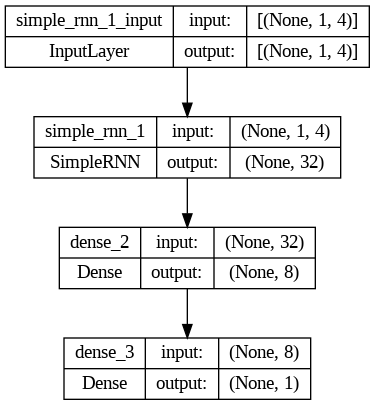

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)